In [1]:
import os, sys
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

sys.path.append('..')
from src.postprocessing import SmoothTiles

<Figure size 720x720 with 0 Axes>

In [2]:
size_w=128

# Generate Test

In [3]:
def get_random_prediction(size=128, n=2, cuda=True):
    device = 'cuda' if cuda and torch.cuda.is_available() else 'cpu'
    img_main = torch.normal(0, 1, size=(size, size, n**2)).to(device)
    img_sub = torch.normal(0, 1, size=(size, size, (n+1)**2)).to(device)
    return img_main, img_sub

def get_black_prediction(size=128, n=2, cuda=True):
    device = 'cuda' if cuda and torch.cuda.is_available() else 'cpu'
    img_main = torch.zeros((size, size, n**2)).to(device)
    img_sub = torch.ones((size, size, (n+1)**2)).to(device)
    return img_main, img_sub

# img_main, img_sub = get_random_prediction(size_w, 3)
img_main, img_sub = get_black_prediction(size_w, 3)
print(img_main.shape, img_sub.shape)

torch.Size([128, 128, 9]) torch.Size([128, 128, 16])


# Show window

In [4]:
st = SmoothTiles()

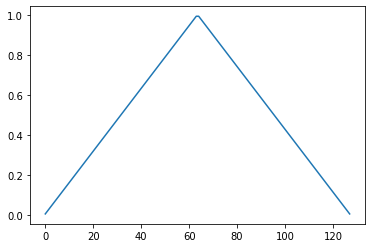

In [5]:
plt.plot(st.triangle(size_w))

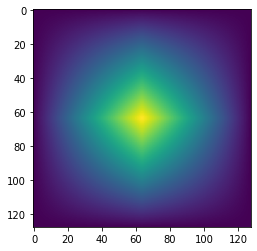

In [6]:
plt.imshow(st.window_2D(size_w, st.triangle))

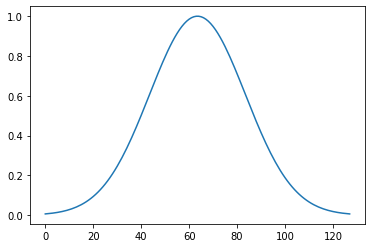

In [7]:
plt.plot(st.gauss(size_w, 20))

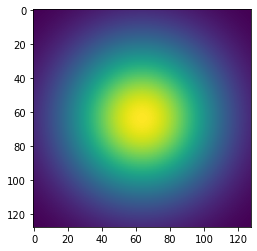

In [8]:
plt.imshow(st.window_2D(size_w, st.gauss))

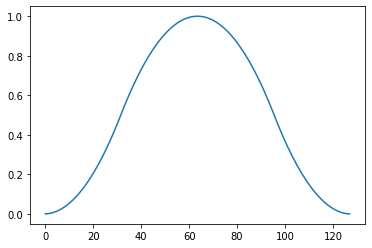

In [9]:
plt.plot(st.spline(size_w))

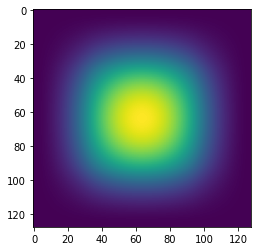

In [10]:
plt.imshow(st.window_2D(size_w, st.spline))

# Smooth Tiles

In [11]:
def concat(img):
    n = int(np.sqrt(img.shape[-1]))
    big_img = torch.reshape(img, (img.shape[0], img.shape[1], n, n))
    sub_img = []
    for i in range(n):
        tpl_img = tuple([j for j in big_img[:, :, :, i].permute(2, 0, 1)])
        sub_img.append(np.concatenate(tpl_img, axis=1))
    return np.concatenate(tuple(sub_img), axis=0)

torch.Size([128, 128, 9])


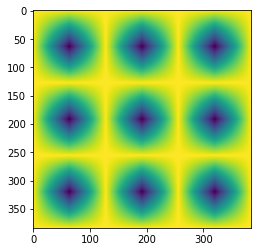

In [12]:
smooth = st.merge(img_main, img_sub)
print(smooth.shape)
plt.imshow(concat(smooth.to('cpu')))